<a href="https://www.kaggle.com/code/sitbayevalibek/new-york-home-predict?scriptVersionId=131988526" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-dataset/Housing.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})


In [6]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [7]:
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':2, 'semi-furnished':1, 'unfurnished':0})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [9]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,0.009229,0.046049,0.067159,0.018847,0.011781,0.010308,0.004385,1.000000,0.130023,0.067864,0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,0.130023,1.000000,0.159173,0.117382,0.150477


In [10]:
df.corrwith(df['price']).abs().sort_values(ascending=False)

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
dtype: float64

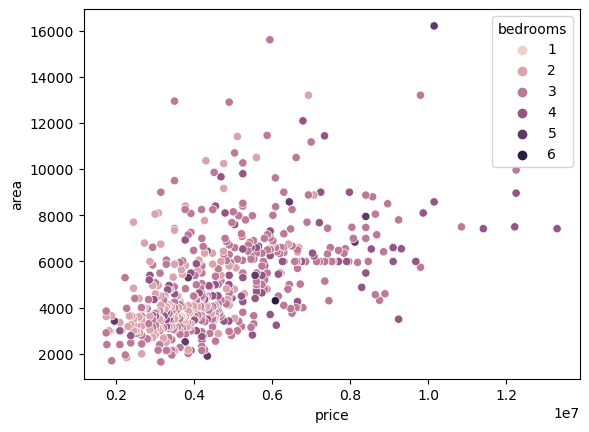

In [11]:
sns.scatterplot(data=df, x='price', y='area', hue='bedrooms')
plt.show()

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [13]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

In [15]:
std_scaler = StandardScaler()

In [16]:
X_train_pre = std_scaler.fit_transform(X_train)

In [17]:
LR_model = LinearRegression()

In [18]:
LR_model.fit(X_train_pre, y)

LinearRegression()

In [19]:
test_data = X_train.sample(15)
test_labels = y.loc[test_data.index]

In [20]:
tdp = std_scaler.fit_transform(test_data)
tdp

array([[-0.21847126, -1.00392929, -0.70710678, -0.97991187, -2.        ,
        -0.39223227, -0.70710678, -0.26726124, -0.70710678,  0.21997067,
        -0.81649658, -1.07588766],
       [ 0.52171923,  0.87843813,  1.41421356, -0.97991187,  0.5       ,
        -0.39223227,  1.41421356, -0.26726124, -0.70710678,  0.21997067,
         1.22474487,  0.16552118],
       [-0.38304724, -1.00392929, -0.70710678, -0.97991187,  0.5       ,
        -0.39223227, -0.70710678, -0.26726124, -0.70710678, -0.87988269,
        -0.81649658, -1.07588766],
       [-0.17833078,  0.87843813,  1.41421356,  0.15075567,  0.5       ,
        -0.39223227,  1.41421356, -0.26726124, -0.70710678, -0.87988269,
        -0.81649658,  0.16552118],
       [-0.57572156, -0.06274558, -0.70710678, -0.97991187,  0.5       ,
        -0.39223227, -0.70710678, -0.26726124, -0.70710678,  1.31982404,
         1.22474487, -1.07588766],
       [-0.54360917,  2.76080554, -0.70710678,  0.15075567,  0.5       ,
        -0.39223227, -

In [21]:
predicted_data = LR_model.predict(tdp)

In [22]:
result = pd.DataFrame({'Predicted':predicted_data, 'Real price': test_labels})
result['Predicted'] = result['Predicted'].map('{:.0f}'.format)
pd.DataFrame(result)

,Predicted,Real price
293,2756467,4200000
122,5821861,5950000
496,2779257,2695000
238,5095649,4613000
379,3702837,3633000
395,3522545,3500000
338,3986097,3885000
47,6899507,7490000
334,3839662,3920000
85,6779112,6510000


# Modelni baholash

In [23]:
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

In [24]:
X_test_pre = std_scaler.fit_transform(X_test)

In [25]:
X_test_predicted = LR_model.predict(X_test_pre)

In [26]:
result_test = pd.DataFrame({'Predicted':X_test_predicted, 'Real price': y_test})
result_test['Predicted'] = result_test['Predicted'].map('{:.0f}'.format)
pd.DataFrame(result_test)

,Predicted,Real price
316,4947176,4060000
77,6940101,6650000
360,2970912,3710000
90,4449237,6440000
493,3233881,2800000
...,...,...
15,4867265,9100000
357,4311776,3773000
39,6676383,7910000
54,6052260,7350000


In [27]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, X_test_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(f"{lin_rmse:.2f}")

1350749.47
